## K-fold cross-validation

We randomly split the training set into $k$ folds **without** replacement.
- Use $k-1$ folds as the training subset
- Use one fold as the validation set

Repeat $k$ times

We report the average performance of the models based on different, independent folds.

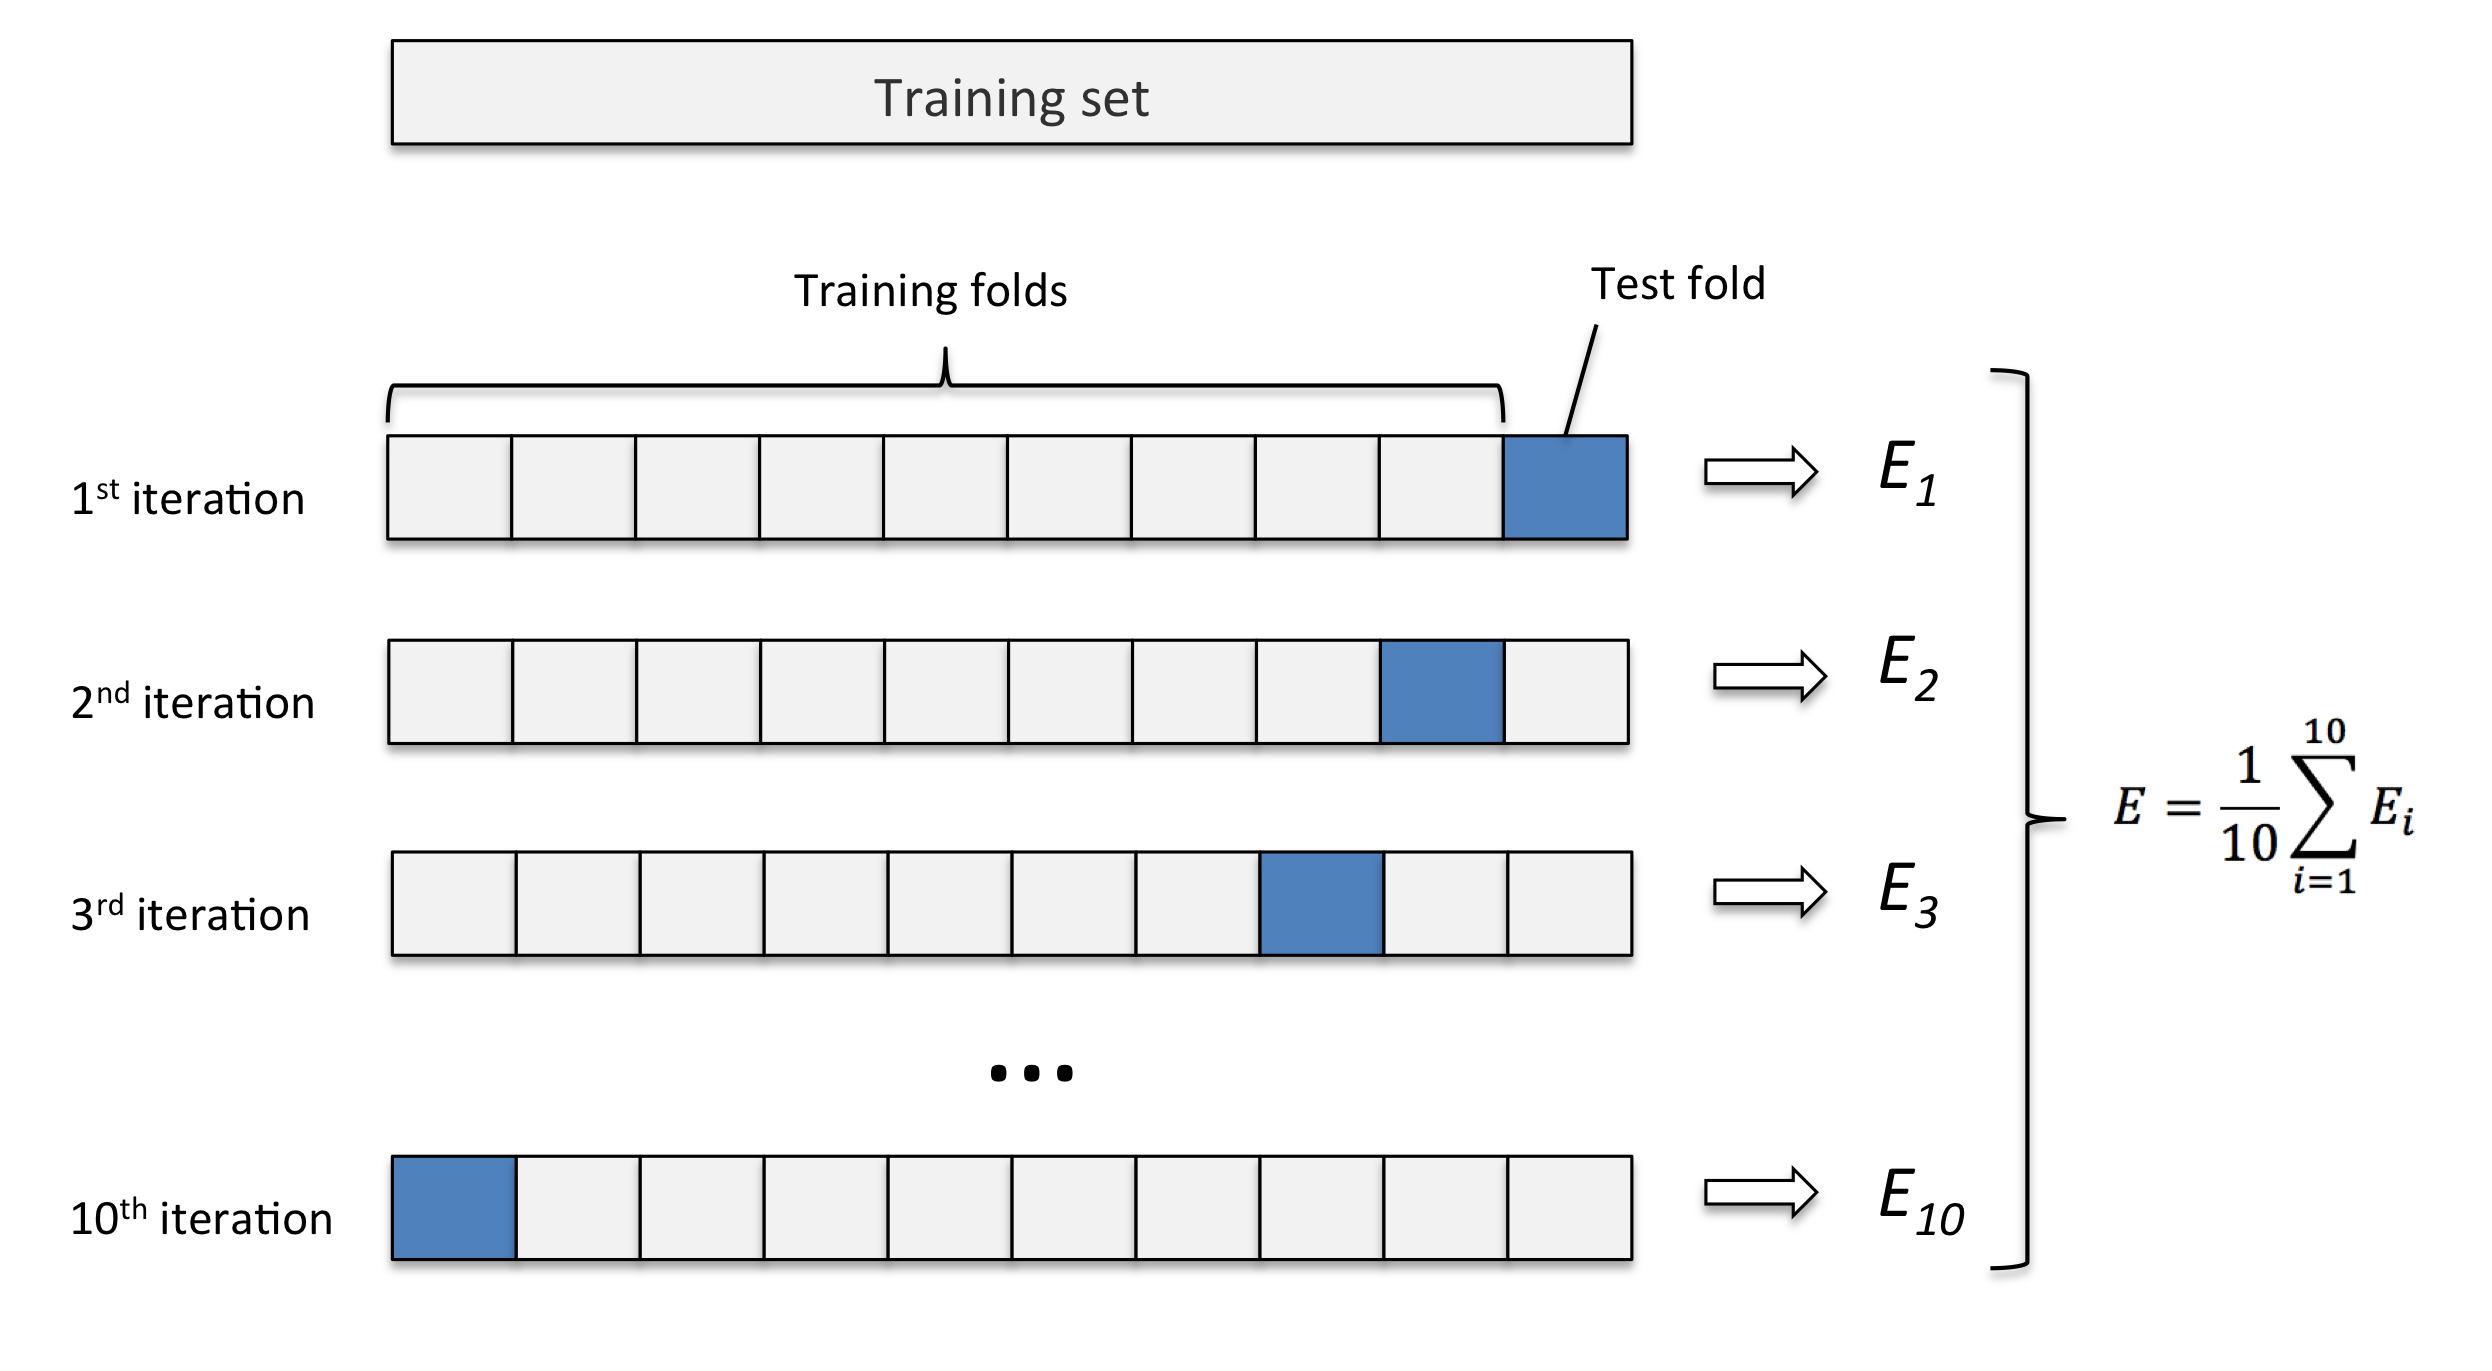

In [1]:
from IPython.display import Image
%matplotlib inline
Image(filename='./images/06_03.png', width=500) 

Note that each data point will be part of validation exactly once in each iteration.

- For small datasets, use larger values of $k$ (e.g., $k=25$):
  - More training data will be used in each iteration
  - Less bias towards estimating the generalization performace by averaging many individual model estimates
  - Larger runtime
  - LOO (leave-one-out) CV: $k=n$, $n$ is the number of training examples
  
  
- For large datasets, use smaller values of $k$ (e.g., $k=5$)


In [2]:
import pandas as pd
import urllib

try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)

except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
    
print('rows, columns:', df.shape)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
print(y)
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])   # M=malignant, B=benign
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=1)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

clf = SVC(kernel='linear', C=1)

scores = cross_val_score(estimator=clf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.93478261  0.89130435  0.95652174  0.91304348  0.97826087  1.
  0.95555556  1.          0.97777778  0.95555556]
CV accuracy: 0.956 +/- 0.034


## Tuning hyperparameters via grid search 

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state=1)

clf.get_params().keys()


dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [9]:
param_range = [0.1, 1.0, 10.0]

param_grid = [{'C': param_range, 
               'kernel': ['linear']},
               {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=clf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [12]:
gs.cv_results_

{'mean_fit_time': array([ 0.33268476,  2.50669699,  5.07588477,  0.02073874,  0.01438422,
         0.01034484,  0.01377125,  0.01268315,  0.01246257,  0.01561222,
         0.01634593,  0.01146836]),
 'mean_score_time': array([ 0.00118484,  0.00128446,  0.00115261,  0.00304399,  0.00321221,
         0.00290599,  0.00953608,  0.0021358 ,  0.00198102,  0.0041378 ,
         0.00387254,  0.00185299]),
 'mean_test_score': array([ 0.95604396,  0.94725275,  0.94065934,  0.62637363,  0.62637363,
         0.62637363,  0.62637363,  0.62637363,  0.62637363,  0.62637363,
         0.62637363,  0.62637363]),
 'mean_train_score': array([ 0.96538462,  0.97142857,  0.97362637,  0.62637363,  0.62637363,
         0.62637363,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ]),
 'param_C': masked_array(data = [0.1 1.0 10.0 0.1 0.1 0.1 1.0 1.0 1.0 10.0 10.0 10.0],
              mask = [False False False False False False False False False False False False],
        fill_v

In [13]:
print(gs.best_score_)
print(gs.best_params_)

0.956043956044
{'C': 0.1, 'kernel': 'linear'}
